In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Data Preparation and analysis
import the Pandas library and start data preprocessing, preparation and reading the datasets

In [38]:
import pandas as pd
#plant = get_df(["../input/solar-power-generation-data/Plant_{}_Generation_Data.csv".format(i) for i in range(1,3)], parse_dates=["DATE_TIME"])
plant1 = pd.read_csv("Plant_1_Generation_Data.csv")




In [39]:
plant1.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [72]:
plant1.head(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
5,15-05-2020 00:00,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
6,15-05-2020 00:00,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
7,15-05-2020 00:00,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
8,15-05-2020 00:00,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0
9,15-05-2020 00:00,4135001,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0


In [5]:
# Check missing values
plant1.isnull().sum().sort_values(ascending=False)

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [6]:
#Prints information of all columns:
plant1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [37]:
#Formatedattime
import datetime as dt
plant1['DATE_TIME']= pd.to_datetime(plant1['DATE_TIME'],format='%d-%m-%Y %H:%M')
weather1['DATE_TIME']= pd.to_datetime(weather1['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')
plant1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [47]:
plant1.groupby("SOURCE_KEY")["DATE_TIME"].count().sum()

68778

In [45]:
# Total number of rows 22 (Source_keys)*15*24hr*34days =71808
plant1.shape[0]

68778

In [10]:
#Unique values of inverter id
plant1['SOURCE_KEY'].agg(['count', 'size', 'nunique'])

count      68778
size       68778
nunique       22
Name: SOURCE_KEY, dtype: int64

In [11]:
#Inverterids
#Some inverters have more data points then the others
plant1.SOURCE_KEY.value_counts()

bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
wCURE6d3bPkepu2    3126
z9Y9gH1T5YWrNuG    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
rGa61gmuvPhdLxV    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
adLQvlD726eNBSB    3119
1IF53ai7Xc0U56Y    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: SOURCE_KEY, dtype: int64

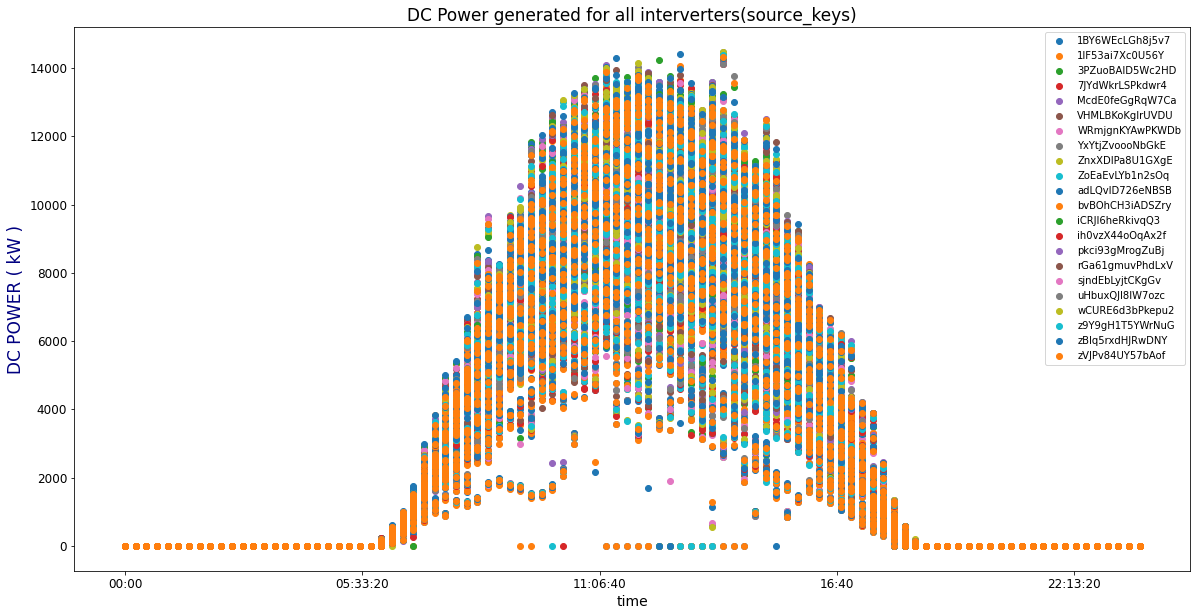

In [12]:
#DC power generated from each source keys
sources=plant1.copy()
sources['time']=sources['DATE_TIME'].dt.time
sources.set_index('time').groupby('SOURCE_KEY')['DC_POWER'].plot(style='o',legend=True,figsize=(20,10))
plt.title('DC Power generated for all interverters(source_keys)',size=17)
plt.ylabel('DC POWER ( kW )',color='navy',fontsize=17)
plt.show()

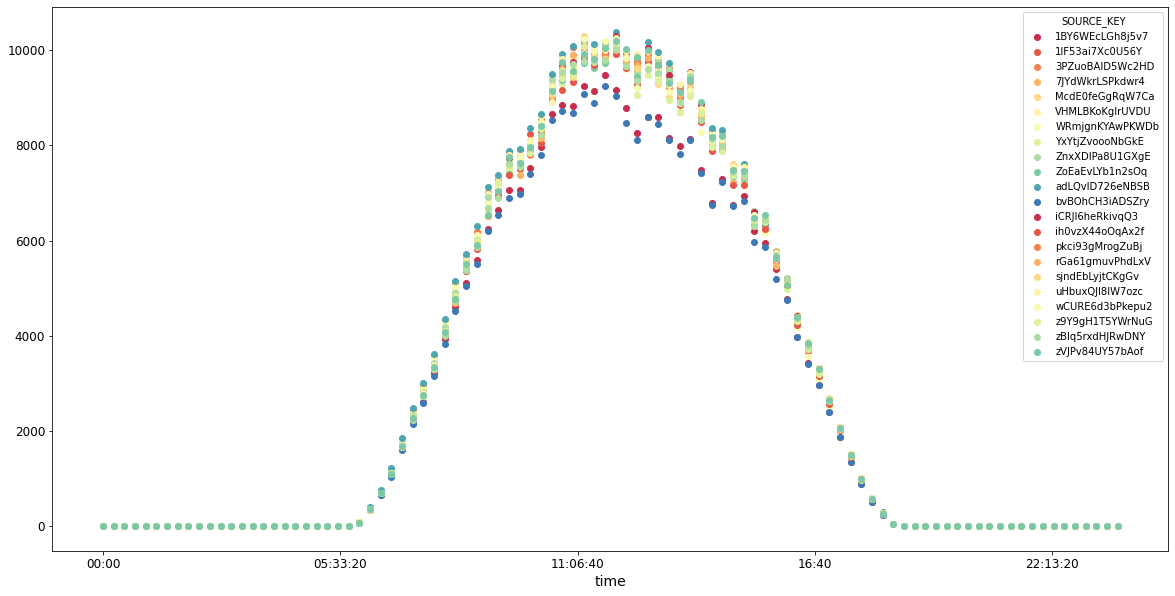

In [13]:
import seaborn as sns
dc_gen=plant1.copy()
dc_gen['time']=dc_gen['DATE_TIME'].dt.time
dc_gen=dc_gen.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack()

cmap = sns.color_palette("Spectral", n_colors=12)

#fig,ax=plt.subplots(ncols=3,nrows=1,dpi=100,figsize=(20,6))
dc_gen.iloc[:,0:22].plot(style='o',figsize=(20,10),color=cmap)
plt.show()

<AxesSubplot:xlabel='DATE_TIME'>

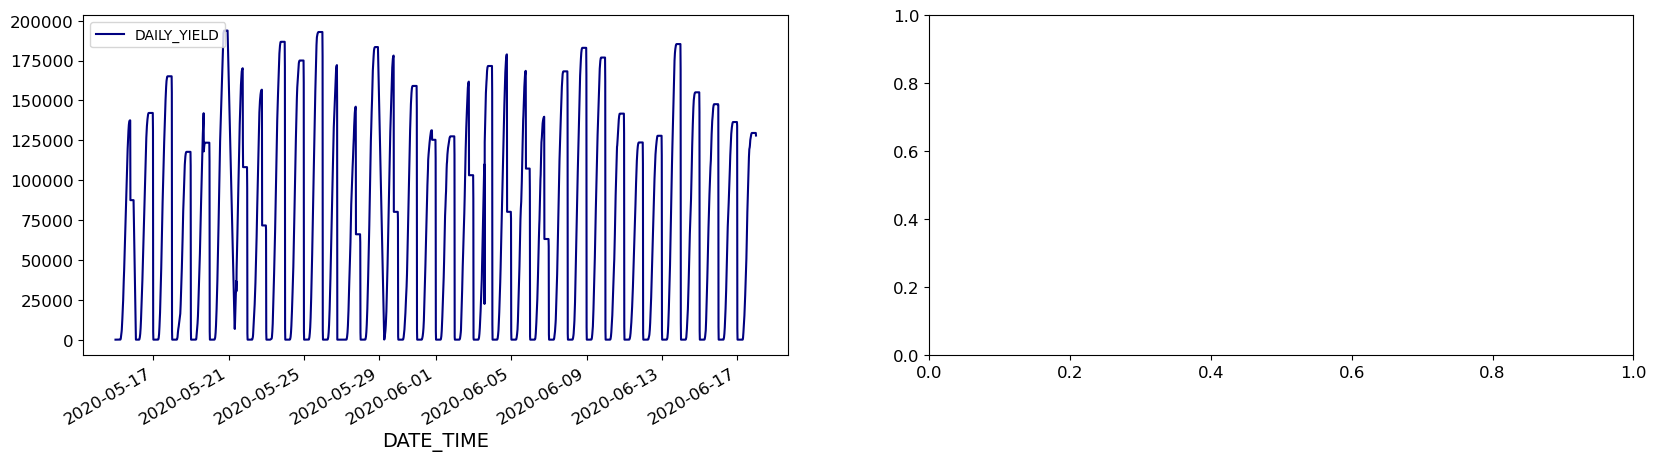

In [60]:
df_plant1=plant1.groupby('DATE_TIME').sum().reset_index()
df_plant1['time']=df_plant1['DATE_TIME'].dt.time

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))
# daily yield plot
df_plant1.plot(x='DATE_TIME',y='DAILY_YIELD',color='navy',ax=ax[0])

In [8]:
weather1 = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")
weather1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [16]:
# drop unwanted columns. 
df_weather = weather1.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)
df_plant1 = plant1.drop(['PLANT_ID'], axis=1)

In [20]:
df_plant_weather1 = df_plant1.merge(df_weather, on="DATE_TIME")
print(df_plant_weather1)


                DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0     2020-05-15 00:00:00  1BY6WEcLGh8j5v7       0.0       0.0        0.000   
1     2020-05-15 00:00:00  1IF53ai7Xc0U56Y       0.0       0.0        0.000   
2     2020-05-15 00:00:00  3PZuoBAID5Wc2HD       0.0       0.0        0.000   
3     2020-05-15 00:00:00  7JYdWkrLSPkdwr4       0.0       0.0        0.000   
4     2020-05-15 00:00:00  McdE0feGgRqW7Ca       0.0       0.0        0.000   
...                   ...              ...       ...       ...          ...   
68769 2020-06-17 23:45:00  uHbuxQJl8lW7ozc       0.0       0.0     5967.000   
68770 2020-06-17 23:45:00  wCURE6d3bPkepu2       0.0       0.0     5147.625   
68771 2020-06-17 23:45:00  z9Y9gH1T5YWrNuG       0.0       0.0     5819.000   
68772 2020-06-17 23:45:00  zBIq5rxdHJRwDNY       0.0       0.0     5817.000   
68773 2020-06-17 23:45:00  zVJPv84UY57bAof       0.0       0.0     5910.000   

       TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEM

In [21]:
corr_matrix = df_plant_weather1.corr()

In [22]:
corr_matrix["DC_POWER"].sort_values(ascending=False)

DC_POWER               1.000000
AC_POWER               0.999996
IRRADIATION            0.989391
MODULE_TEMPERATURE     0.954811
AMBIENT_TEMPERATURE    0.724668
DAILY_YIELD            0.082243
TOTAL_YIELD            0.003851
Name: DC_POWER, dtype: float64

Saving figure scatter_matrix_plot


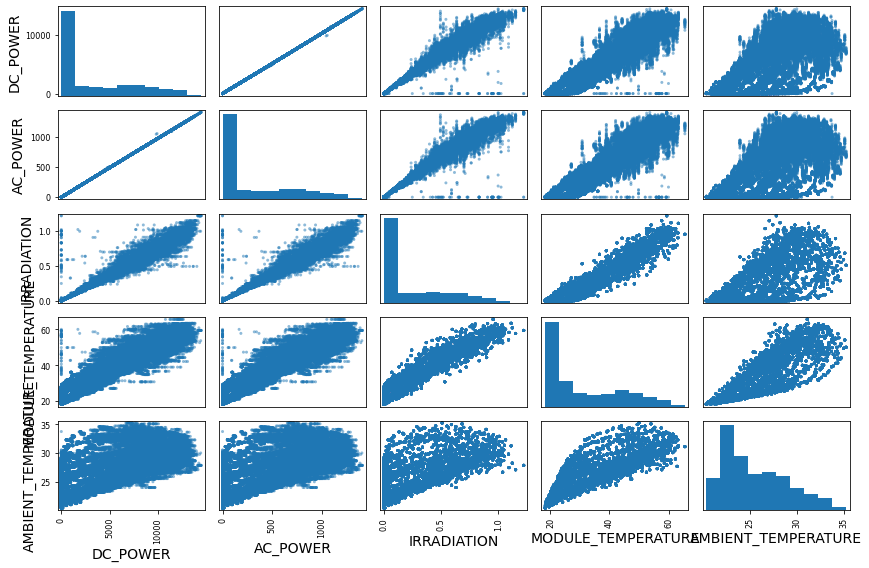

In [27]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Data_analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

from pandas.plotting import scatter_matrix

attributes = ["DC_POWER", "AC_POWER", "IRRADIATION",
              "MODULE_TEMPERATURE","AMBIENT_TEMPERATURE"]
scatter_matrix(df_plant_weather1[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

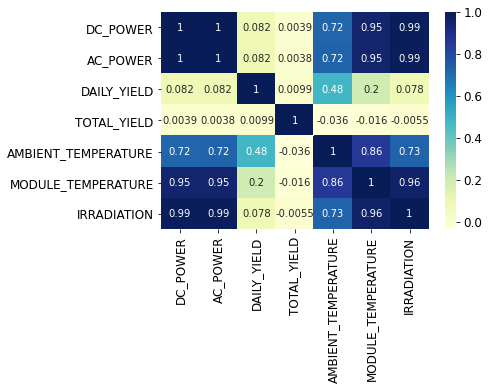

In [48]:
fig_corr = sns.heatmap(corr_matrix,cmap="YlGnBu", annot=True)
plt.show()

In [61]:
plant2 = pd.read_csv("Plant_2_Generation_Data.csv")
plant2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [62]:
plant1.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


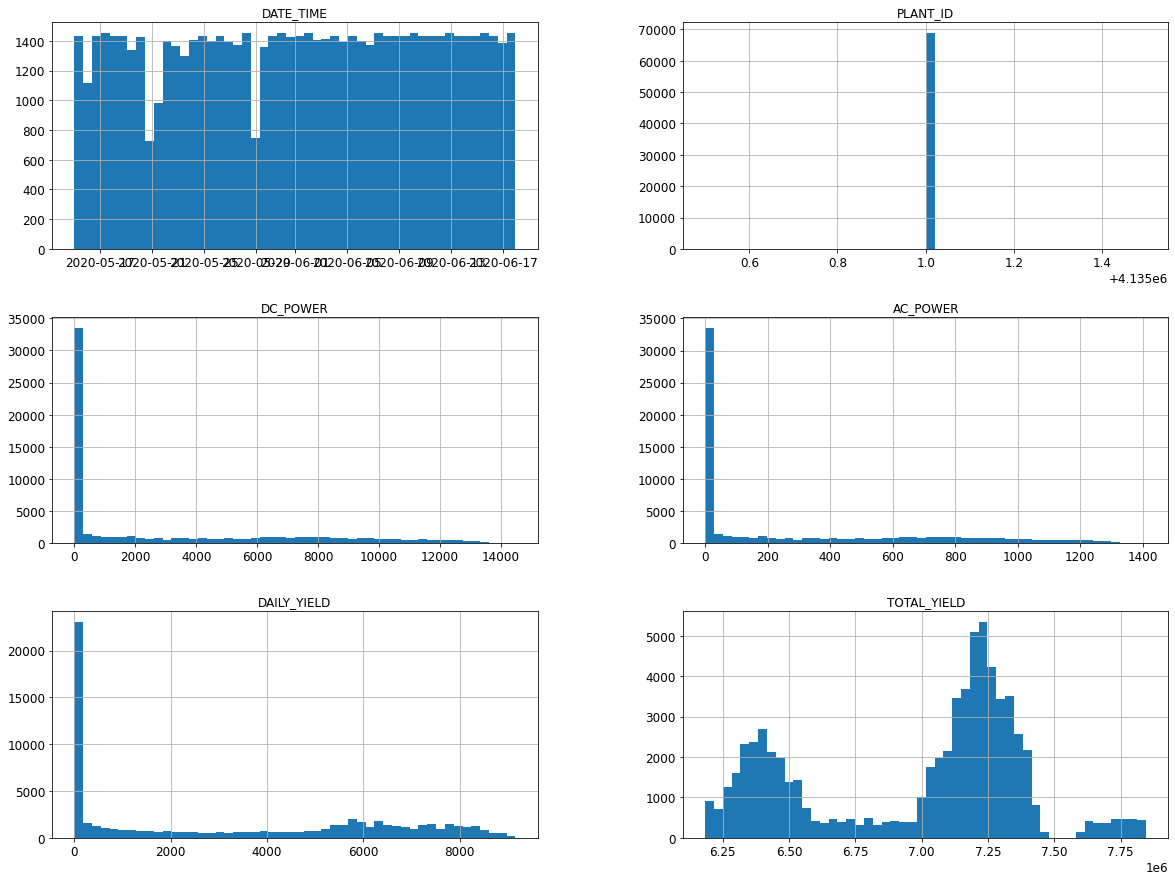

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plant1.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [8]:
weather1 = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")
weather1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [9]:
weather1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


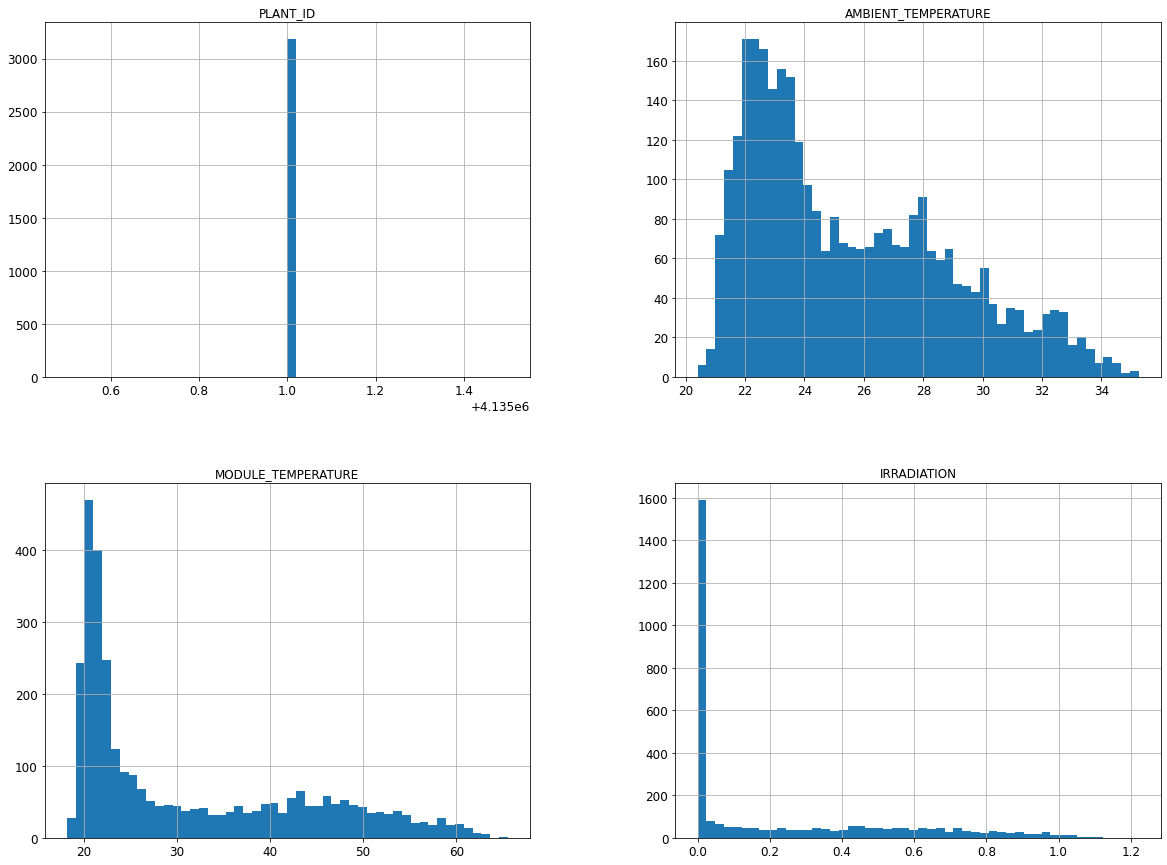

In [67]:
import matplotlib.pyplot as plt
weather1.hist(bins=50, figsize=(20,15))
plt.show()